In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv('~/EdX-Data-Scientist-Education/UCSanDiegoX-DSE200x-Python-for-Data-Science/Week-5-Data-Visualization/world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


## What is the range of years?

In [4]:
years = data['Year'].unique().tolist()
print(min(years), '-',max(years))

1960 - 2015


## What are the unique Country names and codes, and how many are there?

In [5]:
# List unique countries and the count or length of list
countries = data['CountryName'].unique().tolist()
countryCode = data['CountryCode'].unique().tolist()


print(countries, countryCode, len(countries), len(countryCode))

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Euro area', 'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'High income: nonOECD', 'High income: OECD', 'Latin America & Caribbean (all income levels)', 'Latin America & Caribbean (developing only)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa (all income levels)', 'Middle East & North Africa (developing only)', 'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Small states', 'South Asia', 'Sub-Saharan Africa (all income levels)', 'Sub-Saharan Africa (developing only)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', '

## Checking for null values

In [6]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

## Value Statistics - use to evaluate overall country exports from 1980 - 2015

In [7]:
data['Value'].describe()

count    5.656458e+06
mean     1.070501e+12
std      4.842469e+13
min     -9.824821e+15
25%      5.566242e+00
50%      6.357450e+01
75%      1.346722e+07
max      1.103367e+16
Name: Value, dtype: float64

In [8]:
data.std(axis=0)

Year     1.387895e+01
Value    4.842469e+13
dtype: float64

In [9]:
data['CountryName'].count()

5656458

## Most common value in column 'Value'

In [10]:
data['Value'].mode()

0    0.0
dtype: float64

## Lowest value in column 'Value'

In [11]:
data['Value'].min()

-9824821297572060.0

## Highest value in column 'Value'

In [12]:
data['Value'].max()

11033666000000000.0

## Remove Unwanted CountryCode rows

### Find grouped countries via the country code

In [13]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [14]:
data.set_index('CountryCode', inplace=True, drop=False)

In [15]:
data = data.drop(['HIC', 'OEC', 'OED', 'NOC', 'CEB', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'LCN', 'FCS', 'LAC', 'LMY', 'MEA', 'MNA', 'MIC', 'NAC', 'SSF', 'UMC', 'SSA', 'LMC', 'EAS', 'HPC', 'LDC', 'LIC'], axis=0)
#data.head(10)

In [16]:
data = data.reset_index(drop=True)

In [17]:
data.shape

(5059963, 6)

## Select Arms Exports from all countries

In [99]:
# Data selected: Arms exports
arms_stage = data[data['IndicatorName'].str.contains('Arms exports \(SIPRI')]

In [100]:
arms_stage.shape

(2024, 6)

In [101]:
arms_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4664484,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,1.019400e+10
4606252,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,5.971000e+09
4472579,France,FRA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,1.978000e+09
4453682,United Kingdom,GBR,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,1.704000e+09
4408557,Germany,DEU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,1.200000e+09


## Filter for yearly USA exports

In [95]:
# select Arms export for the World
hist_indicator = 'Arms exports \(SIPRI'
hist_year = 2014
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
#mask2 = data['Year'].isin([hist_year])
mask2 = data['Year'].between(1960, 1980)
mask3 = data['CountryCode'].str.contains(hist_country)


# stage is just those indicators matching the 1980 for year and Arms export over time.
usa_stage = data[mask1 & mask3]
usa_67 = data[mask1 & mask2 & mask3]

In [96]:
usa_stage.head(11)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4664484,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2014,1.019400e+10
4629943,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2013,7.384000e+09
4651699,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2012,9.018000e+09
4652810,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2011,9.111000e+09
4640880,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2010,8.169000e+09
4621048,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2009,6.822000e+09
4620931,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2008,6.814000e+09
4636237,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2007,7.834000e+09
4631888,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2006,7.521000e+09
4620019,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,2005,6.758000e+09


In [23]:
type(usa_stage)

pandas.core.frame.DataFrame

## Bar Chart Arms Export per Capita

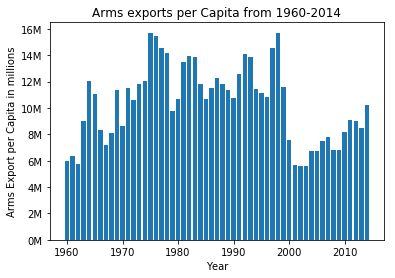

In [93]:
# get the years
years = arms_stage['Year'].values
# get the values
arms = arms_stage['Value'].values

# create
plt.bar(years,arms)
plt.title("Arms exports per Capita from 1960-2014")
plt.xlabel("Year")
plt.ylabel("Arms Export per Capita in millions")

# format the number output on the y-axis
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)

plt.show()

## Bar chart of yearly USA arms exports

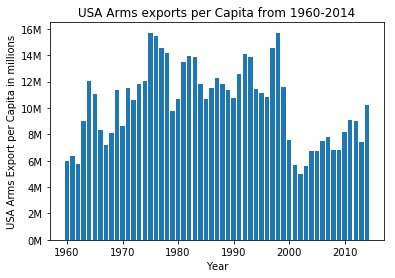

In [97]:
# get the years
years = usa_stage['Year'].values
# get the values
arms = usa_stage['Value'].values

# create
plt.bar(years,arms)
plt.title("USA Arms exports per Capita from 1960-2014")
plt.xlabel("Year")
plt.ylabel("USA Arms Export per Capita in millions")

# format the number output on the y-axis
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)

plt.show()

Notable years: 2002, 2013
There is an increase in global exports compared to USA

## Line Graph of USA arms exports annual

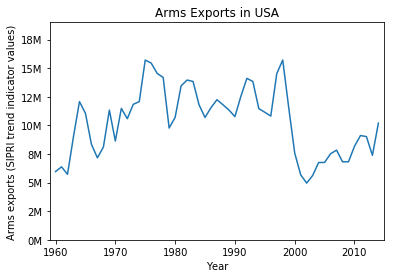

In [30]:
# switch to a line plot
plt.plot(usa_stage['Year'].values, usa_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(usa_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Arms Exports in USA')

# to make more honest, start the y axis at 0
plt.axis([1959, 2015, 0, 1.9e10])

ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.yaxis.set_major_formatter(formatter)

plt.show()

## Histogram of Global and USA Arms exports annual

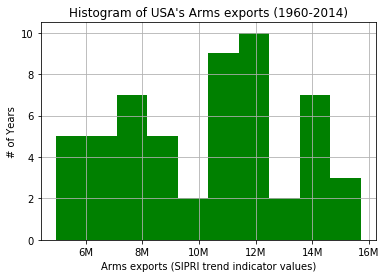

In [31]:
hist_data = usa_stage['Value'].values
plt.hist(usa_stage['Value'].values, 10, normed=False, facecolor='green')

plt.xlabel(usa_stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title("Histogram of USA's Arms exports (1960-2014)")

ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA has many years where it exported between 10M-12M arms per capita with outliers on either side.

In [32]:
print(hist_data)

[  5.96100000e+09   6.37600000e+09   5.72500000e+09   9.02900000e+09
   1.20770000e+10   1.10540000e+10   8.34900000e+09   7.16500000e+09
   8.10100000e+09   1.13340000e+10   8.63400000e+09   1.14780000e+10
   1.05850000e+10   1.18390000e+10   1.20740000e+10   1.57080000e+10
   1.54400000e+10   1.45370000e+10   1.41860000e+10   9.76400000e+09
   1.06970000e+10   1.34510000e+10   1.39600000e+10   1.38340000e+10
   1.17960000e+10   1.06890000e+10   1.15480000e+10   1.22430000e+10
   1.18010000e+10   1.13420000e+10   1.07620000e+10   1.25400000e+10
   1.41070000e+10   1.38360000e+10   1.14610000e+10   1.11460000e+10
   1.08080000e+10   1.45180000e+10   1.57080000e+10   1.15530000e+10
   7.59100000e+09   5.68200000e+09   4.95500000e+09   5.61800000e+09
   6.75200000e+09   6.75800000e+09   7.52100000e+09   7.83400000e+09
   6.81400000e+09   6.82200000e+09   8.16900000e+09   9.11100000e+09
   9.01800000e+09   7.38400000e+09   1.01940000e+10]


## How does USA compare to other countries

In [120]:
data = data.sort_values(by=['Year', 'Value'], ascending=False)
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4918852,South Asia,SAS,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,2015,2.287139e+11
4914010,Pakistan,PAK,"Disbursements on external debt, long-term (DIS...",DT.DIS.DLXF.CD,2015,2.111025e+11
4913622,South Asia,SAS,"PPG, private creditors (DIS, current US$)",DT.DIS.PRVT.CD,2015,2.097367e+11
4913619,South Asia,SAS,"PPG, commercial banks (DIS, current US$)",DT.DIS.PCBK.CD,2015,2.097213e+11
4913319,Pakistan,PAK,"PPG, private creditors (DIS, current US$)",DT.DIS.PRVT.CD,2015,2.087984e+11
4913320,Pakistan,PAK,"PPG, commercial banks (DIS, current US$)",DT.DIS.PCBK.CD,2015,2.087984e+11
4730595,Romania,ROM,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,2015,2.014780e+10
4727366,Mexico,MEX,"Principal repayments on external debt, long-te...",DT.AMT.DLXF.CD,2015,1.946834e+10
4724948,South Asia,SAS,"PPG, official creditors (DIS, current US$)",DT.DIS.OFFT.CD,2015,1.897722e+10
4721109,Mexico,MEX,"PPG, private creditors (AMT, current US$)",DT.AMT.PRVT.CD,2015,1.821751e+10


In [121]:
# select arms exports for all countries in 2011
hist_indicator = 'Arms exports \(SIPRI'
hist_year = 1990

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])
mask3 = data['Year'].between(1973, 1981)
mask4 = data['Year'].between(1989, 1996)

# apply our mask
arms_1990 = data[mask1 & mask2]
arms_range1 = data[mask1 & mask3].head(20)
arms_range2 = data[mask1 & mask4].head(20)
arms_1990.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4670076,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,1.076200e+10
4465903,United Kingdom,GBR,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,1.877000e+09
4462962,Germany,DEU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,1.834000e+09
4453239,France,FRA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,1.698000e+09
4375760,China,CHN,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,9.410000e+08


In [122]:
arms_range1

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4692070,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,1.345100e+10
4553128,France,FRA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,3.786000e+09
4496997,United Kingdom,GBR,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,2.403000e+09
4475814,Germany,DEU,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,2.029000e+09
4452661,Italy,ITA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,1.690000e+09
4355588,Netherlands,NLD,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,8.120000e+08
4323869,China,CHN,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,6.420000e+08
4323240,Switzerland,CHE,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,6.390000e+08
4240877,Poland,POL,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,3.460000e+08
4211955,Norway,NOR,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1981,2.780000e+08


### Histogram of Top 20 arms contributors from 1973-1981

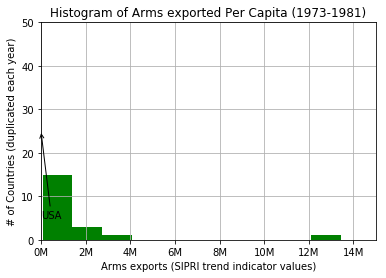

In [113]:
# let's plot a histogram of the arms exported per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(20, 25), xycoords='data',
            xytext=(15, 5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(arms_range1['Value'], 10, normed=False, facecolor='green')

plt.xlabel(arms_range1['IndicatorName'].iloc[0])
plt.ylabel('# of Countries (duplicated each year)')
plt.title('Histogram of Arms exported Per Capita (1973-1981)')

plt.axis([0, 1.5e10, 0, 50])
plt.grid(True)

ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)


plt.show()

In [88]:
arms_range2

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4696661,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1992,1.410700e+10
4694834,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1993,1.383600e+10
4685231,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1991,1.254000e+10
4676393,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1994,1.146100e+10
4675317,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1989,1.134200e+10
4673572,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1995,1.114600e+10
4670520,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1996,1.080800e+10
4670076,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1990,1.076200e+10
4556602,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1995,3.900000e+09
4544913,Russian Federation,RUS,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1996,3.539000e+09


### Histogram of Top 20 contributors from 1989-1996

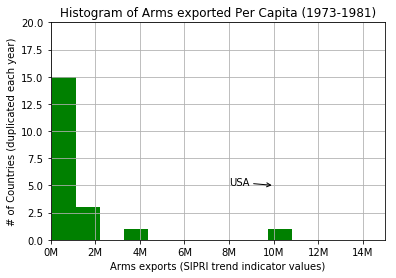

In [119]:
# let's plot a histogram of the arms exported per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(10e9, 5), xycoords='data',
            xytext=(8e9, 5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(arms_range2['Value'], 10, normed=False, facecolor='green')

plt.xlabel(arms_range2['IndicatorName'].iloc[0])
plt.ylabel('# of Countries (duplicated each year)')
plt.title('Histogram of Arms exported Per Capita (1973-1981)')

plt.axis([0, 1.5e10, 0, 20])
plt.grid(True)

ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)


plt.show()

## Histogram of arms exports per capita by country

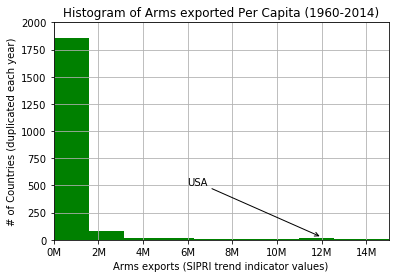

In [52]:
# let's plot a histogram of the arms exported per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(12e9, 25), xycoords='data',
            xytext=(6e9, 500), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(arms_stage['Value'], 10, normed=False, facecolor='green')

plt.xlabel(arms_stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries (duplicated each year)')
plt.title('Histogram of Arms exported Per Capita (1960-2014)')

plt.axis([0, 1.5e10, 0, 2000])
plt.grid(True)

ax = plt.gca()
ax.xaxis.get_major_formatter().set_scientific(False)

def millions(x, pos):
    'The two args are the value and tick position'
    return '{:.0f}M'.format(x*1e-9)

formatter = FuncFormatter(millions)

ax.xaxis.set_major_formatter(formatter)


plt.show()

In [34]:
print(len(arms_stage))

2024


##### So the USA, at ~12M arms is an outlier, as most countries have 0-1M arms exported from 1960-2014

## Relationship between Death rate and Arms Exports in the USA

In [50]:
# select GDP Per capita emissions for the United States
hist_indicator = 'Death rate, crude \(p'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
#gdp_stage = data[mask1 & mask2]
gdp_stage = data[mask1]
usa_death = data[mask1 & mask2]

#plot gdp_stage vs stage

In [41]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
13,Arab World,ARB,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,19.754452
91,Caribbean small states,CSS,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960,9.813167


In [42]:
usa_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19360,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,5.961000e+09
42551,United States,USA,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1961,6.376000e+09


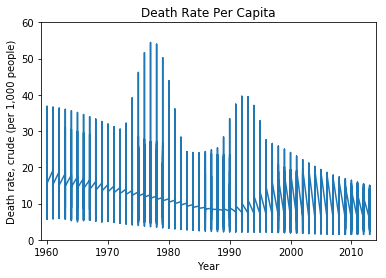

In [71]:

# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('Death Rate Per Capita')

# to make more honest, start they y axis at 0
plt.axis([1959, 2014,0,60])

plt.show()

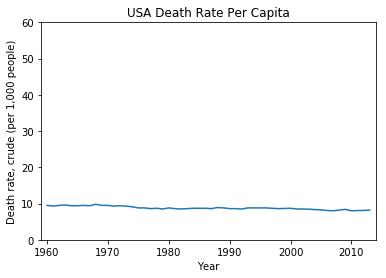

In [72]:
# switch to a line plot
plt.plot(usa_death['Year'].values, usa_death['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(usa_death['IndicatorName'].iloc[0])

#label the figure
plt.title('USA Death Rate Per Capita')

# to make more honest, start they y axis at 0
plt.axis([1959, 2014,0,60])

plt.show()